In [1]:
import os
import json
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tqdm

### 1. Collecting distance transformed images

In [2]:
items = [f for f in os.listdir('data_dir/raw_experiment/images') if f[-4:]=='.jpg']
midd = len(items)//2
items = items#[:midd]

In [6]:
threshold = 200
fn = lambda x : 255 if x > threshold else 0

In [ ]:
for item in tqdm.tqdm(items):
    im = Image.open('data_dir/raw_experiment/images/'+item).convert("L")

    # binarization
    image = im.convert('L').point(fn, mode='1')
    binarized_data = np.array(image)
    to_int = np.vectorize(int)
    binary_data = to_int(image)
    
    # 1. Euclidean
    euc_tranformed = ndimage.distance_transform_edt(binary_data)
    euc_tranformed = np.round(255*euc_tranformed/np.max(euc_tranformed)).astype('uint8')

    # 2. Chessboard
    chess_tranformed = ndimage.distance_transform_cdt(binary_data, metric='chessboard')
    chess_tranformed = np.round(255*chess_tranformed/np.max(chess_tranformed)).astype('uint8')

    # 3. Taxicab
    taxicab_tranformed = ndimage.distance_transform_cdt(binary_data, metric='taxicab')
    taxicab_tranformed = np.round(255*taxicab_tranformed/np.max(taxicab_tranformed)).astype('uint8')
    
    # final transform in accordance with RGB channels
    # reversed for convenience
    transformed_data = 255 - np.array([list(zip(x, y, z)) for x, y, z in\
                                 zip(euc_tranformed, chess_tranformed, taxicab_tranformed)])
    PIL_image = Image.fromarray(transformed_data)
    PIL_image.save('../../dtrans_experiment/images/'+item)

  2%|▏         | 3466/139291 [23:22<14:51:58,  2.54it/s]

### 2. Mixing channels: original (greyscacle), euclidean, chessboard

In [4]:
items = [f for f in os.listdir('data_dir/raw_experiment/images') if f[-4:]=='.jpg']
#done = set([f for f in os.listdir('../../mixed_experiment/images') if f[-4:]=='.jpg'])
#items = list(items.difference(done))

In [18]:
for item in tqdm.tqdm(items):
    img = Image.open('data_dir/raw_experiment/images/'+item)
    grey = img.convert('L')
    dt_img = Image.open('data_dir/dtrans_experiment/images/'+item)
    euc, chess, taxicab = dt_img.split()
    mixed = Image.merge("RGB", (grey, euc, chess))
    mixed.save('data_dir/mixed_experiment/images/'+item)

100%|██████████| 1/1 [00:00<00:00, 45.55it/s]


In [2]:
# for test random_stuff
items = [f for f in os.listdir('data_dir/test_images/random_stuff/images') if f[-4:]=='.jpg']

In [3]:
fn = lambda x : 255 if x > threshold else 0
        
for item in tqdm.tqdm(items):
    if item.split('.')[0][-2:] == 'ph':
        threshold = 135
    else:
        threshold = 200
        
    im = Image.open('data_dir/test_images/random_stuff/images/'+item).convert("L")
    grey = im
        
    # binarization
    image = im.convert('L').point(fn, mode='1')
    binarized_data = np.array(image)
    to_int = np.vectorize(int)
    binary_data = to_int(image)
    
    # 1. Euclidean
    euc_tranformed = ndimage.distance_transform_edt(binary_data)
    euc_tranformed = 255 - np.round(255*euc_tranformed/np.max(euc_tranformed)).astype('uint8')

    # 2. Chessboard
    chess_tranformed = ndimage.distance_transform_cdt(binary_data, metric='chessboard')
    chess_tranformed = 255 - np.round(255*chess_tranformed/np.max(chess_tranformed)).astype('uint8')
    
    # final transform in accordance with RGB channels
    # reversed for convenience
    euc = Image.fromarray(euc_tranformed)
    chess = Image.fromarray(chess_tranformed)
    
    mixed = Image.merge("RGB", (grey, euc, chess))
    mixed.save('data_dir/test_images/random_stuff/mixed_images/'+item)

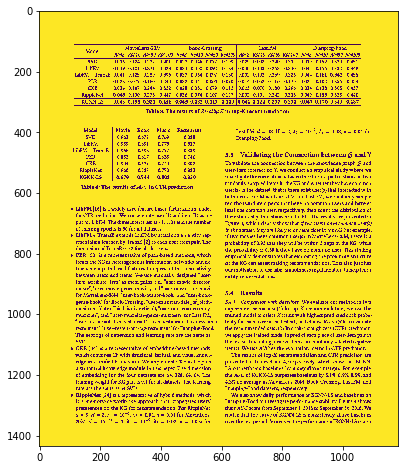

In [49]:
plt.figure(figsize=(12, 8))
plt.imshow(binary_data);